In [0]:
#import library
import pandas as pd #pandas untuk menangani dataframe
import numpy as np  #numpy untuk menghitung mean, standar deviasi, dan fung
import random       #untuk generate bilangan random
import copy         #untuk penggunaan copy
import math         #untuk penggunaan fungsi matematika seperti akar

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
from random import randint
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#data preperation yakni mengimport dataset
df = pd.read_csv('drive/My Drive/malin/used_cars.csv')
#mengecek banyak baris x kolom
df.shape

(20001, 26)

In [0]:
#setting pandas agar dapat menampilkan semua kolom baris dan kolom
pd.set_option('display.max_rows', None)  #None untuk show all rows
pd.set_option('display.max_columns', 26) #26 unutk show 26 kolom

In [0]:
#data exploration

#mengecek apakah masih ada nilai null pada dataframe
df.isnull().values.any()
#------------------------

#Code jumlah baris dataframe
df.shape
#-------------------------

#melihat tipe data 
df.dtypes
#-------------------------

#Code count missing values
df.isnull().sum()
#--------------------------


Unnamed: 0          0
id                  0
url                 0
region              0
region_url          0
price               0
year               12
manufacturer      705
model             265
condition        9152
cylinders        7085
fuel               73
odometer         2389
title_status      110
transmission      190
vin              6645
drive            4642
size            13115
type             3659
paint_color      5514
image_url           0
description         0
county          20001
state               0
lat              1031
long             1031
dtype: int64

In [0]:
#memilih fitur yang akan digunakan
problem = df[['manufacturer','price','year']].copy() #memilih inputan / feature yang dipilih sesuai dengan masalah yang akan dianalisis

<Figure size 500x500 with 0 Axes>

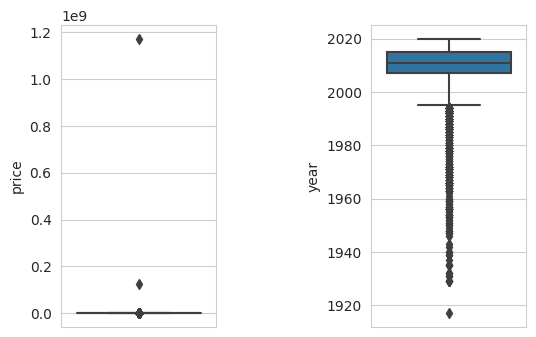

In [0]:
#untuk melihat persebaran data dan melihat outlier
mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(5, 5))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=problem["price"], ax=axes[0])
sns.boxplot(y=problem["year"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [0]:
#data cleansing
#ini merupakan bagian dari eksperimen yang menangani outlier.
#untuk eksperimen 1, dan 2 jalankan c1,c2,c3
#untuk eksperimen 3 dan 3 comment ci,c2,c3
#untuk eksperimen 3,dan 4 tinggal di comment saja c1,c2,c2 nya
c1 = problem.drop(problem.loc[problem['price']==0].index, inplace=True)
c2 = problem.drop(problem.loc[problem['price']>=36400].index, inplace=True)
c3 = problem.drop(problem.loc[problem['year']<= 1996].index, inplace=True)

#eksperimen 2, dan 4
#mengisi row nan dengan most recently call
problem = problem.fillna(problem.mode().iloc[0])

#eksperimen 1, dan 3
#dop untuk row yang baerisi null
#problem = problem.dropna()

#mengecek apakah masih ada nilai null pada dataframe
problem.isnull().values.any()

False

In [0]:
#cek shape dataframe setelah di cleansing dari data null dan outlier
problem.shape

(16085, 3)

In [0]:
problem.head(10)

,manufacturer,price,year
0,volkswagen,17899,2012.0
5,ram,13999,2009.0
6,ford,34500,2017.0
7,gmc,14500,2007.0
8,ford,12500,2013.0
9,ram,34500,2012.0
11,gmc,16500,2013.0
12,toyota,14500,2007.0
13,gmc,27999,2015.0
14,ram,14999,2004.0


<Figure size 500x500 with 0 Axes>

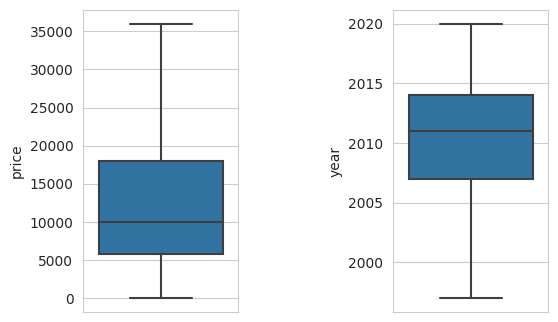

In [0]:
mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(5, 5))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=problem["price"], ax=axes[0])
sns.boxplot(y=problem["year"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [0]:
#memilih masalah yang dianalisis yakni mobil bermerk je
mobil = problem.loc[problem['manufacturer'] == 'jeep']
mobil.head(10)
mobil.shape

(823, 3)

<Figure size 500x500 with 0 Axes>

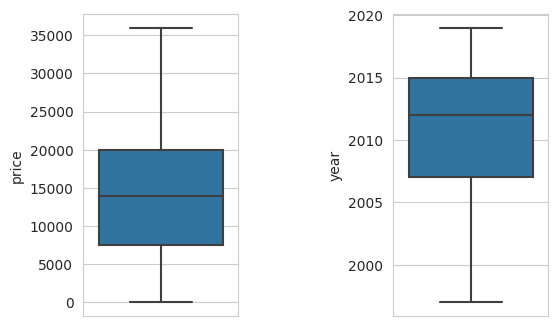

In [0]:
mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(5, 5))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=mobil["price"], ax=axes[0])
sns.boxplot(y=mobil["year"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [0]:
#price dan year discalling karena memiliki rentang yang lumayaran jauh
#karena column price dan year terdapat perbedaan jarak yang lumayan besar

#ini merupakan formula untuk scalling
#z = (x - u) / s
#Where z adalah nilai baru, x adalah nilai asal, u adalah mean and s adalah standar deviasi

#menghitung mean dan standar deviasi column price
price_mean = np.mean(mobil['price'])
price_sd = np.std(mobil['price'])

#menghitung mean dan standar deviasi column year
year_mean = np.mean(mobil['year'])
year_sd = np.std(mobil['year'])

#menambahkan column baru hasil dari scalling ke dalam dataframe
mobil['price_baru'] = mobil.apply(lambda row:(row.year - year_mean) / year_sd, axis = 1)
mobil['year_baru']  = mobil.apply(lambda row:(row.price - price_mean) / price_sd, axis = 1)

#memilih column yang baru ditambahkan ke dalam data frame mobil agar bisa digunakan untuk proses yang akan datang
mobil = copy.deepcopy(mobil[['manufacturer','price_baru','year_baru','price','year']])

#memunculkan nilai min - max dari column baru
#funsinya untuk memilih scale yang tepat dalam memplot data nanti
print(min(mobil['price_baru']))
print(max(mobil['price_baru']))
print(min(mobil['year_baru']))
print(max(mobil['year_baru']))

-2.571914483334051
1.5287445194174707
-1.754208992064726
2.578642607501927


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [0]:
#export data hasil cleansing
mobil.to_csv('clustering_eksperimen4.csv')

In [0]:
#menampilkan column baru hasil dari scalling
#sekarang terlihat bahwa selisih dari kedua kolom tsb sangat kecil
mobil.head(10)

,manufacturer,price_baru,year_baru,price,year
21,jeep,-0.521585,2.084563,31895,2008.0
73,jeep,0.969564,2.214553,32975,2016.0
76,jeep,-0.521585,0.592577,19499,2008.0
104,jeep,1.528745,-0.792048,7995,2019.0
172,jeep,-1.267159,-0.129465,13500,2004.0
211,jeep,-0.521585,-0.972589,6495,2008.0
221,jeep,-1.267159,-0.792048,7995,2004.0
233,jeep,0.223989,-0.009706,14495,2012.0
235,jeep,0.223989,-0.551328,9995,2012.0
244,jeep,0.783170,1.133717,23995,2015.0


In [0]:
#untuk mengecek berapa berapa baris dan kolom data yang telah discalling
mobil.shape

(823, 5)

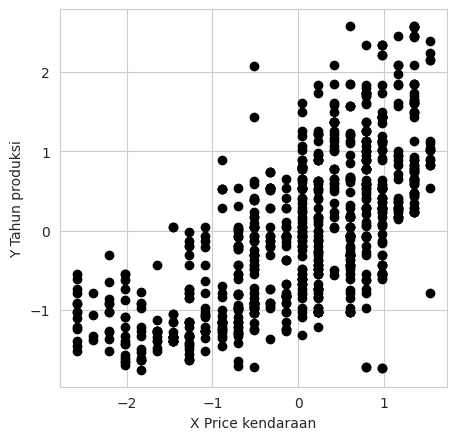

In [0]:
#menampilkan data dari kolom yang baru discalling
fig = plt.figure(figsize=(5, 5))
plt.scatter(mobil['price_baru'], mobil['year_baru'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
plt.xlim() #skala dipilih dari hasil analisis setelah melihat nilai min max dari kolom baru
plt.ylim() #skala dipilih dari hasil analisis setelah melihat nilai min max dari kolom baru
plt.xlabel("X Price kendaraan")
plt.ylabel("Y Tahun produksi")
plt.show()

In [0]:
#menentukan titik centroid berdasarkan data frame baru
centroid = []
centroids = []
for i in range(3): #looping sebanyak K
  x = random.randint(0, mobil.shape[0]) #random angka mulai dari row 1 sampai jumlah row mobil
  centroid.append(mobil.iloc[x]['price_baru']) #memilih kolom price_baru saja pada dataframe mobil
  centroid.append(mobil.iloc[x]['year_baru'] ) #memilih kolom year_baru saja pada dataframe mobil
  centroids.append(centroid)
  centroid = []
#centroid[[],[],[]]

In [0]:
#spawn 3 titik centroid awal secara random
centroids

[[0.9695637463149905, -0.586834129868638],
 [0.5967765642466704, 1.1042285378141163],
 [-2.571914483334051, -0.6109061963125206]]

In [0]:
#rumus euclidean untuk menghitung jarak setiap titik terhadap centroid
def eucD(p1, q1, p2, q2):
  value_euc = (((p1 - p2) ** 2) + ((q1 - q2) ** 2))  
  return math.sqrt(value_euc)

In [0]:
#menghitung jarak setiap titik terhadap centroid, lalu nilai terkecil nya diambil sebagai hasil cluster
def min_centroid(price,year):
  data_tocentroid = []
  for i in range(len(centroids)):
      data_tocentroid.append(eucD(price, year, centroids[i][0], centroids[i][1]))
  new_cluster = min(data_tocentroid)
  smallest_num = data_tocentroid.index(new_cluster) + 1
  return smallest_num
  #hasil return ini akan jadi hasil dari data masuk ke kelompok/clustering yang mana

In [0]:
#untuk membuat titik centroid baru
def new_centroids(mobil_new):
  total = mobil_new.shape[0]
  price_sum = 0
  year_sum = 0
  for row in mobil_new.itertuples(index=True, name='Pandas'):
      price_sum = price_sum + getattr(row, "price_baru")
      year_sum  = year_sum + getattr(row, "year_baru")
  return [price_sum/total , year_sum/total]
  #akan me return titik centroid baru dengan kordinat (x,y) yang berisi rata" dari price, dan rata" dari year


In [0]:
#K-means
prev_centroids = []
h_centroid = []
while True:
  #memanggil fungsi mencari jarak tiap titik ke centroid lalu yang terkecil masuk ke dalam dataframe pada kolom cluster
  mobil['cluster'] = mobil.apply(lambda row:min_centroid(row.price_baru, row.year_baru),axis = 1)
  #dilakukan proses hingga titik centroid tidak berubah lagi
  if prev_centroids != centroids:
    prev_centroids = copy.deepcopy(centroids)
    h_centroid.append(prev_centroids)
    centroids = []
    #akan dilakukan perulanan sebanyak K, k = 3
    for x in range(3):
      #proses untuk mendapatkan titik centroid baru
      centroids.append(new_centroids(mobil[mobil.cluster == int(x + 1)]))
    cluster = copy.deepcopy(mobil['cluster'])
  else:
    break;

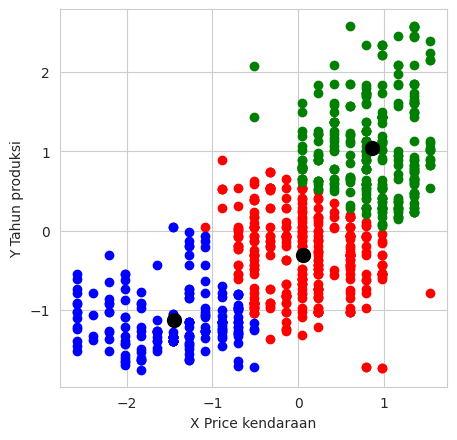

In [0]:
cluster1 = copy.deepcopy(mobil[mobil.cluster == 1]) #simpan hasil cluster yang bernilai = 1 ke var cluster1
cluster2 = copy.deepcopy(mobil[mobil.cluster == 2]) #simpan hasil cluster yang bernilai = 2 ke var cluster2
cluster3 = copy.deepcopy(mobil[mobil.cluster == 3]) #simpan hasil cluster yang bernilai = 2 ke var cluster3


fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster1['price_baru'], cluster1['year_baru'], color='r')
plt.scatter(cluster2['price_baru'], cluster2['year_baru'], color='g')
plt.scatter(cluster3['price_baru'], cluster3['year_baru'], color='b')
for i in range(3):
    plt.scatter(*centroids[i], color='black',s=100,edgecolor='k')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'c', 5: 'm', 6: 'y'}
plt.xlabel("X Price kendaraan")
plt.ylabel("Y Tahun produksi")
plt.xlim()
plt.ylim()
plt.show()

In [0]:
centroids

[[0.049529527155523466, -0.3115465651399679],
 [0.8561334359817011, 1.0420913285394084],
 [-1.4476976410756615, -1.1236046623563893]]

In [0]:
#untuk melihat 10 data pertama dari dataframe mobil dan hasil cluster nya
mobil.head(10)

,manufacturer,price_baru,year_baru,price,year,cluster
21,jeep,-0.521585,2.084563,31895,2008.0,2
73,jeep,0.969564,2.214553,32975,2016.0,2
76,jeep,-0.521585,0.592577,19499,2008.0,1
104,jeep,1.528745,-0.792048,7995,2019.0,1
172,jeep,-1.267159,-0.129465,13500,2004.0,3
211,jeep,-0.521585,-0.972589,6495,2008.0,1
221,jeep,-1.267159,-0.792048,7995,2004.0,3
233,jeep,0.223989,-0.009706,14495,2012.0,1
235,jeep,0.223989,-0.551328,9995,2012.0,1
244,jeep,0.783170,1.133717,23995,2015.0,2


In [0]:
prev_centroids

[[0.049529527155523466, -0.3115465651399679],
 [0.8561334359817011, 1.0420913285394084],
 [-1.4476976410756615, -1.1236046623563893]]